In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

2.14.0


In [ ]:
file_id = '19D_cplgL3bDiJUblFBptEuARLvGfZGHR'
link = f'https://drive.google.com/uc?id={file_id}'
bank_data = pd.read_csv(link)
bank_data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0.0,0.0,1.0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0.0,0.0,1.0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0.0,0.0,0.0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0.0,0.0,0.0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0.0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0.0,0.0,0.0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85.0,0.0,0.0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0.0,0.0,0.0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0.0,0.0,0.0,0,1,0


In [ ]:
bank_data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              2
Personal Loan         1
Securities Account    1
CD Account            0
Online                0
CreditCard            0
dtype: int64

<Axes: title={'center': 'Heatmap showing Correlation between all the features'}>

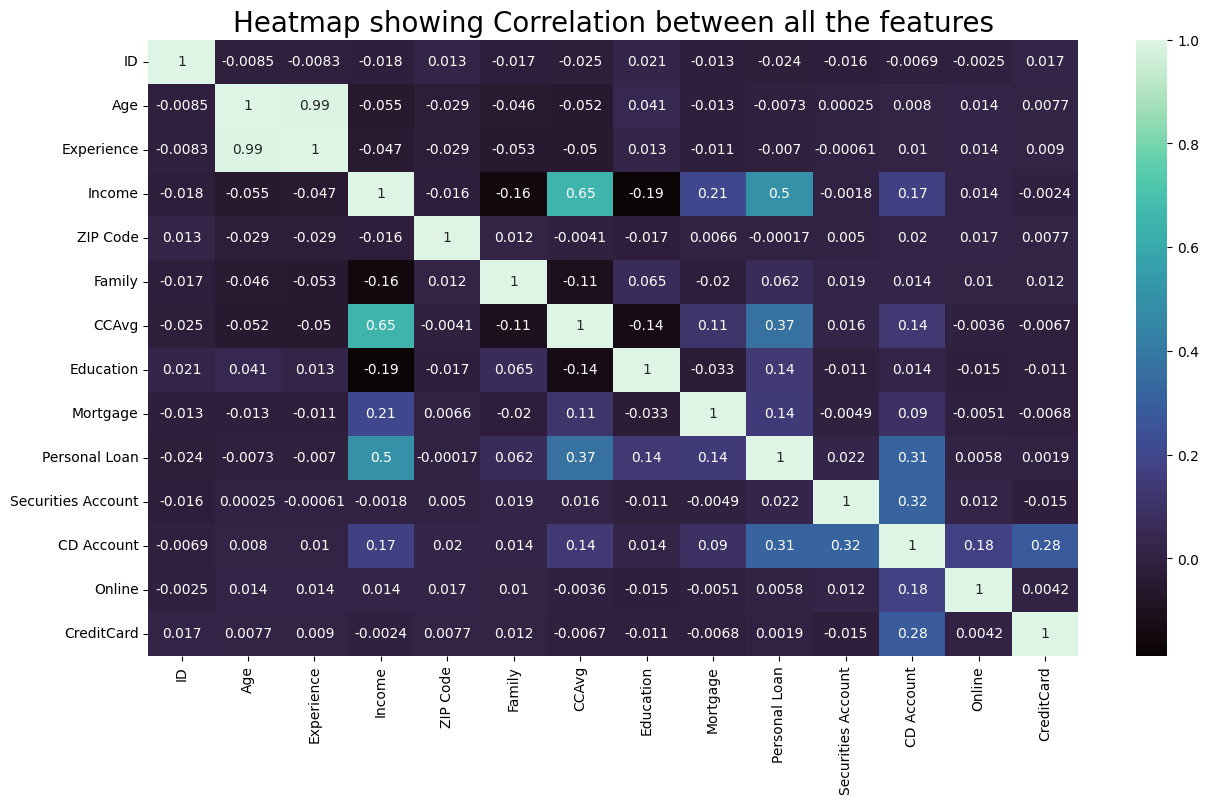

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Heatmap showing Correlation between all the features", fontsize=20)
sns.heatmap(bank_data.corr(),annot = True, cmap='mako')

In [ ]:
df1 = bank_data.drop(["ID","ZIP Code"], axis = 1)
df1

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0.0,0.0,1.0,0,0,0
1,45,19,34,3,1.5,1,0.0,0.0,1.0,0,0,0
2,39,15,11,1,1.0,1,0.0,0.0,0.0,0,0,0
3,35,9,100,1,2.7,2,0.0,0.0,0.0,0,0,0
4,35,8,45,4,1.0,2,0.0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0.0,0.0,0.0,0,1,0
4996,30,4,15,4,0.4,1,85.0,0.0,0.0,0,1,0
4997,63,39,24,2,0.3,3,0.0,0.0,0.0,0,0,0
4998,65,40,49,3,0.5,2,0.0,0.0,0.0,0,1,0


In [ ]:

# Create a SimpleImputer instance with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit and transform the 'Personal Loan', 'Mortgage', 'Securities Account' column with the imputer
df1['Personal Loan'] = imputer.fit_transform(df1[['Personal Loan']])
df1['Mortgage'] = imputer.fit_transform(df1[['Mortgage']])
df1['Securities Account'] = imputer.fit_transform(df1[['Securities Account']])

# Display the updated DataFrame with missing values filled
print(df1)

      Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1      49       4    1.6          1       0.0   
1      45          19      34       3    1.5          1       0.0   
2      39          15      11       1    1.0          1       0.0   
3      35           9     100       1    2.7          2       0.0   
4      35           8      45       4    1.0          2       0.0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3      40       1    1.9          3       0.0   
4996   30           4      15       4    0.4          1      85.0   
4997   63          39      24       2    0.3          3       0.0   
4998   65          40      49       3    0.5          2       0.0   
4999   28           4      83       3    0.8          1       0.0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0               0.0                 1.0           0       0           0  
1               0.0    

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit(df1.drop('CreditCard',axis=1)).transform(df1.drop('CreditCard',axis=1))
df_scaled = pd.DataFrame(scaled, columns=df1.columns[:-1])
df_scaled.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
0,-1.774417,-1.666078,-0.538229,1.397414,-0.193385,-1.049078,-0.555274,-0.325568,2.932018,-0.25354,-1.216618
1,-0.029524,-0.096330,-0.864109,0.525991,-0.250611,-1.049078,-0.555274,-0.325568,2.932018,-0.25354,-1.216618
2,-0.552992,-0.445163,-1.363793,-1.216855,-0.536736,-1.049078,-0.555274,-0.325568,-0.341130,-0.25354,-1.216618
3,-0.901970,-0.968413,0.569765,-1.216855,0.436091,0.141703,-0.555274,-0.325568,-0.341130,-0.25354,-1.216618
4,-0.901970,-1.055621,-0.625130,1.397414,-0.536736,0.141703,-0.555274,-0.325568,-0.341130,-0.25354,-1.216618


In [ ]:
x = df_scaled
y = df1['CreditCard']

x.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
0,-1.774417,-1.666078,-0.538229,1.397414,-0.193385,-1.049078,-0.555274,-0.325568,2.932018,-0.25354,-1.216618
1,-0.029524,-0.096330,-0.864109,0.525991,-0.250611,-1.049078,-0.555274,-0.325568,2.932018,-0.25354,-1.216618
2,-0.552992,-0.445163,-1.363793,-1.216855,-0.536736,-1.049078,-0.555274,-0.325568,-0.341130,-0.25354,-1.216618
3,-0.901970,-0.968413,0.569765,-1.216855,0.436091,0.141703,-0.555274,-0.325568,-0.341130,-0.25354,-1.216618
4,-0.901970,-1.055621,-0.625130,1.397414,-0.536736,0.141703,-0.555274,-0.325568,-0.341130,-0.25354,-1.216618


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: CreditCard, dtype: int64

Use SVM (Support Vector Machines

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
model=SVC()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print('Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy : 0.749


<Axes: >

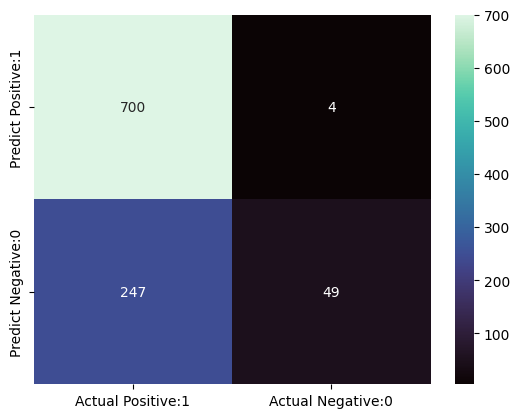

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [ ]:
sfrom sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       704
           1       0.92      0.17      0.28       296

    accuracy                           0.75      1000
   macro avg       0.83      0.58      0.56      1000
weighted avg       0.79      0.75      0.68      1000



In [ ]:
import pickle
pickle.dump(model, open('model_5.pkl','wb'))